## Name:Baneen Nayab
## Reg No: Sk_dsai_192
## Title: Tomato Leaf Diseases Detection Using Convolutional Neural Networks

In [1]:
pip install tensorflow opencv-python matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Load and Preprocess the Data

In [3]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset directory
data_dir = "E:\\Local C _ 21-sep-2024\\Downloads\\Documents\\archive"  # Replace with the path to your dataset

# Set image size
img_size = 128  # Resize images to 128x128

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=20,  # Random rotations
    width_shift_range=0.1,  # Random width shifts
    height_shift_range=0.1,  # Random height shifts
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest',  # Fill in gaps after transformation
    validation_split=0.2  # Use 20% of data for validation
)

# Train generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use 80% of data for training
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 20% of data for validation
)

Found 590 images belonging to 3 classes.
Found 147 images belonging to 3 classes.


# Build the CNN Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(train_generator.num_classes, activation='softmax')  # Output based on number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

C:\Users\Aqeel\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [5]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

C:\Users\Aqeel\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7415 - loss: 0.6742 - val_accuracy: 0.8776 - val_loss: 0.4702
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8816 - loss: 0.5148 - val_accuracy: 0.8776 - val_loss: 0.4583
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8409 - loss: 0.5926 - val_accuracy: 0.8776 - val_loss: 0.4662
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8752 - loss: 0.4970 - val_accuracy: 0.8776 - val_loss: 0.4823
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8649 - loss: 0.5364 - val_accuracy: 0.8776 - val_loss: 0.5501
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8682 - loss: 0.5563 - val_accuracy: 0.8776 - val_loss: 0.4533
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8838 - loss: 0.4412 - val_accuracy: 0.8776 - val_loss: 0.4768
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8711 - loss: 0.4785 - val_accuracy: 0.8776 - val_loss:

# Evaluate the Model

In [6]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.8785 - loss: 0.4581
Validation Loss: 0.45898690819740295
Validation Accuracy: 0.8775510191917419


# Visualize Training Results

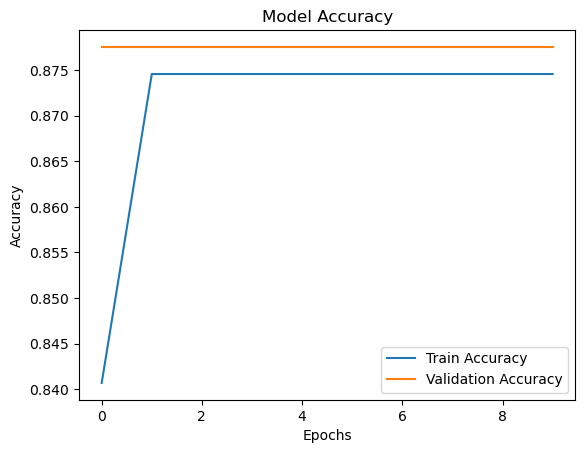

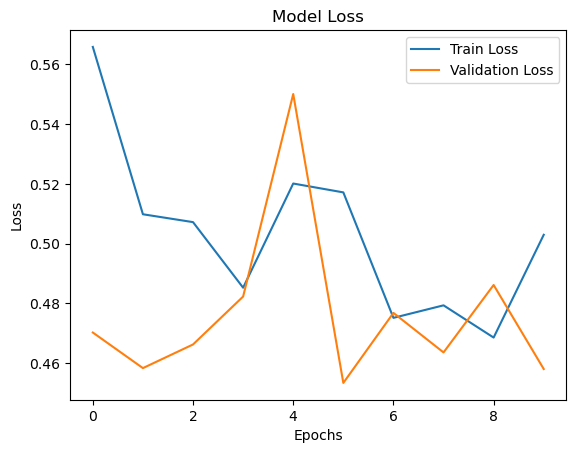

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Save the Model

In [8]:
# Save the model
model.save('tomato_leaf_disease_model.h5')

# Make Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


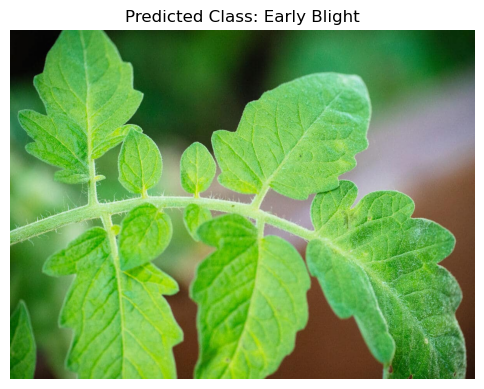

Predicted class index: 1
Predicted class: Early Blight


In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define class labels
class_labels = {
    0: 'Bacterial Spot',
    1: 'Early Blight',
    2: 'Late Blight',
    3: 'Healthy',
    # Add other classes based on your dataset...
}

# Function to preprocess and predict for a new image
def predict_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (img_size, img_size))  # Resize to model's input size
    img_normalized = img_resized.astype('float32') / 255.0  # Normalize
    img_batch = np.expand_dims(img_normalized, axis=0)  # Add batch dimension
    
    # Make prediction
    prediction = model.predict(img_batch)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    return img, predicted_class  # Return original image and predicted class index

# Example usage
image_path = 'C:\\Users\\Aqeel\\Downloads\\2015-09-17-01.jpg'  # Path to your image
original_image, predicted_class = predict_image(image_path)

# Get human-readable label
predicted_label = class_labels.get(predicted_class, 'Unknown Class')

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title(f"Predicted Class: {predicted_label}")
plt.axis('off')  # Turn off axis labels
plt.show()

# Print predicted index and label
print(f"Predicted class index: {predicted_class}")
print(f"Predicted class: {predicted_label}")